# Gap Augmentation

In [1]:
%pwd

'c:\\Users\\S372277\\damolina\\github\\Python'

In [4]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

### Utils

In [5]:
def show_img(old_image, new_image, columns=2, rows=1):
    names = ['old_image', 'new_image']
    image_plt = [old_image, new_image]
    fig=plt.figure(figsize=(15, 15))
    for i, img in enumerate(image_plt, 1):
        ax = fig.add_subplot(rows, columns, i)
        ax.set_title(names[i-1])
        plt.imshow(img, cmap='gray')
    plt.show()

### Load Image

In [17]:
# load the image with imread()
image = '1.jpg'
old_image = cv2.imread(image, cv2.IMREAD_COLOR)
old_image = cv2.cvtColor(old_image, cv2.COLOR_BGR2RGB)

### flipImage

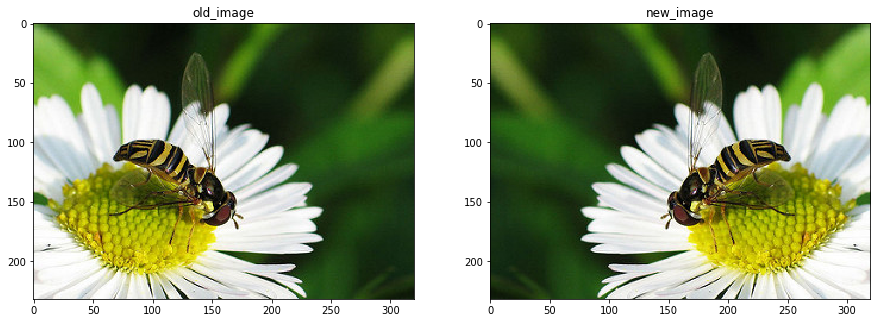

In [8]:
horizontal_img = old_image.copy()
vertical_img = old_image.copy()
both_img = old_image.copy()

horizontal_img = cv2.flip(old_image, 1) # flip img horizontally
vertical_img = cv2.flip(old_image, 0) # flip img vertically
both_img = cv2.flip(old_image, -1) # both axes with flip()

show_img(old_image, horizontal_img)

### zoomImage

(232, 320, 3)
0.002501964569091797
0.0010030269622802734
(232, 320, 3)


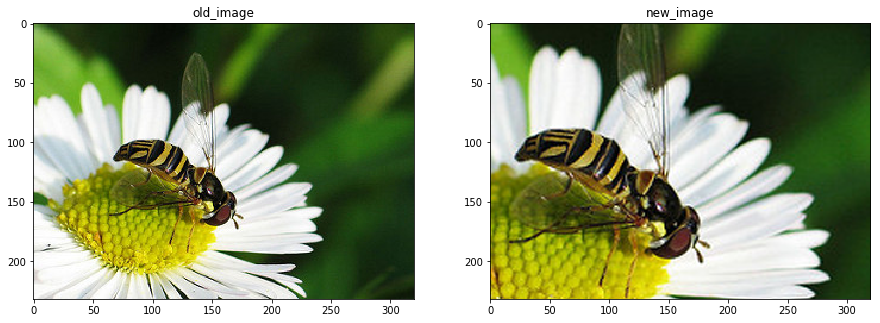

In [9]:
print(old_image.shape)

zoom = 0.5 + 1
old_height, old_width = old_image.shape[:2]

start = time.time()
zoom_image = cv2.resize(old_image, None, fx=zoom, fy=zoom, interpolation = cv2.INTER_CUBIC)
print(time.time() - start)

start = time.time()
zoom_image = cv2.resize(old_image, (int(zoom*old_width), int(zoom*old_height)), interpolation = cv2.INTER_CUBIC)
print(time.time() - start)

new_height, new_width = zoom_image.shape[:2]

y = int(new_height/2)
x = int(new_width/2)
h = int(old_height/2)
w = int(old_width/2)
zoom_image = zoom_image[y-h:y+h, x-w:x+w]
print(zoom_image.shape)

show_img(old_image, zoom_image)

### edgeImage

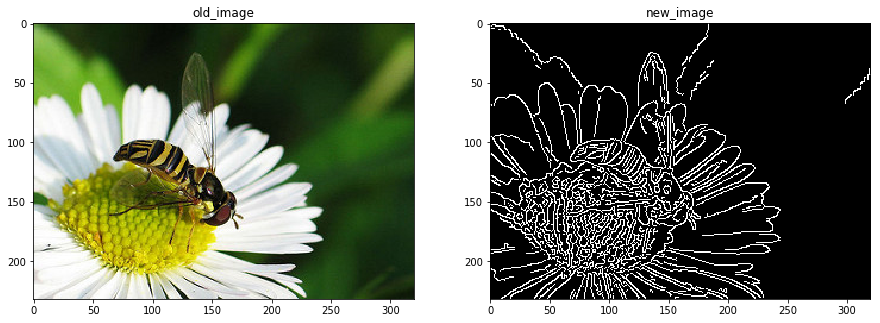

In [18]:
gray = cv2.GaussianBlur(old_image, (3, 3), 0)
edged = cv2.Canny(gray, 20, 100)

show_img(old_image, edged)

### denoiseImage

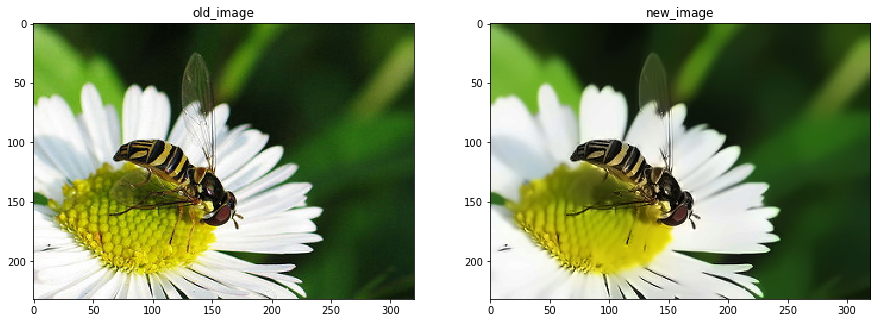

In [19]:
zoom_image = old_image
dst = cv2.fastNlMeansDenoisingColored(zoom_image, None, 10, 10, 7, 21)

show_img(zoom_image, dst)

### brightnesscontrastImage

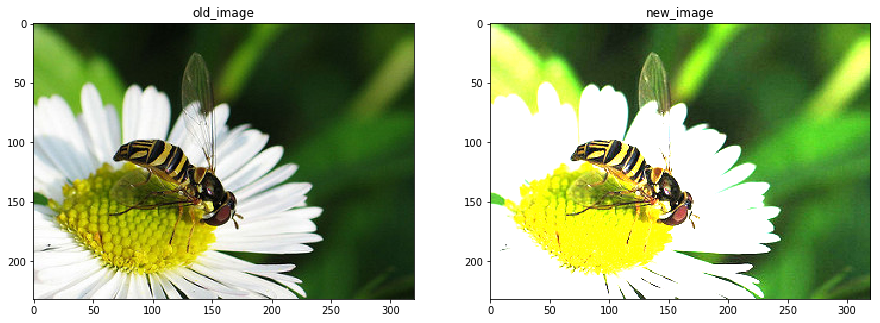

In [22]:
# https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html

contrast = 2.0
brightness = 5
new_image = cv2.convertScaleAbs(old_image, alpha=contrast, beta=brightness)

show_img(old_image, new_image)